## Calculating Correlation Between Variables in Python

correlation is the statistical summary of the relationship between variables and how to calculate it for different types variables and relationships.

- One variable could cause or depend on the values of another variable.
- One variable could be lightly associated with another variable.
- Two variables could depend on a third unknown variable.

Why Calculate?
- useful in data analysis and modeling 

Types:
- Positive Correlation: both variables change in the same direction.
- Neutral Correlation: No relationship in the change of the variables.
- Negative Correlation: variables change in opposite directions.

Generating data using randn() function

data1: mean=98.982 stdv=20.295
data2: mean=149.478 stdv=22.721


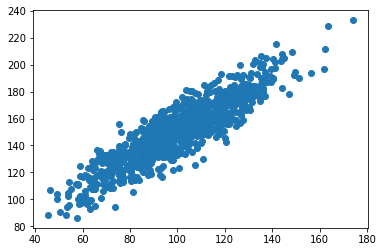

In [36]:
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1123)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
pyplot.scatter(data1, data2)
pyplot.show()

### Covariance
cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)

Interpretation:
- positive - the two variables change in the same direction
- negative - the two variables change in different directions
- zero - both variables are completely independent

In [37]:
# calculate the covariance between two variables
from numpy.random import randn
from numpy.random import seed
from numpy import cov
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


The covariance between the two variables is 389.75
The magnitude of the covariance is not easily interpreted.

Interpretation:
- ![Correlation Interpretation](https://machinelearningmastery.com/wp-content/uploads/2018/04/Table-of-Correlation-Coefficient-Values-and-Their-Interpretation-1024x344.png)

### Pearson's Correlation
- used to summarize the strength of the linear relationship between two data samples.
- the two data samples to have a Gaussian or Gaussian-like distribution.


Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

Returns value between -1 and 1.


In [39]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


### Spearman’s Correlation
- Two variables may be related by a nonlinear relationship, although a monotonic relationship is assumed
- The two variables being considered may have a non-Gaussian distribution.
- Calculated from the relative rank of values on each sample.

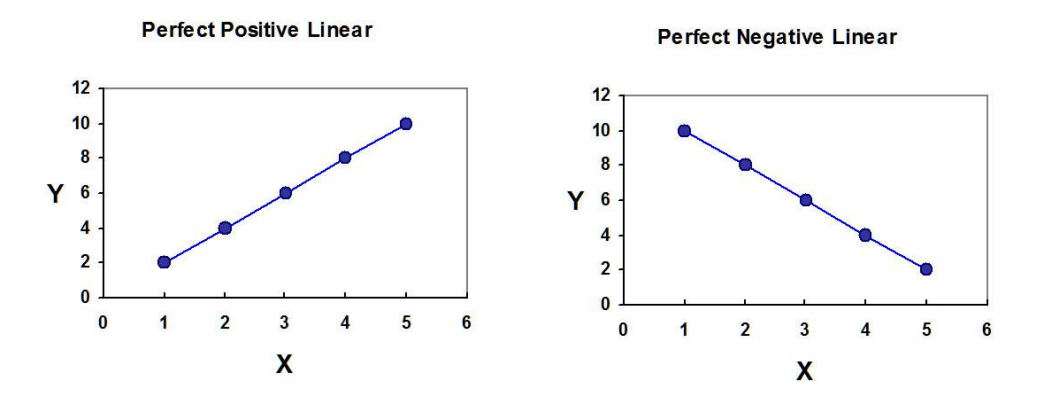

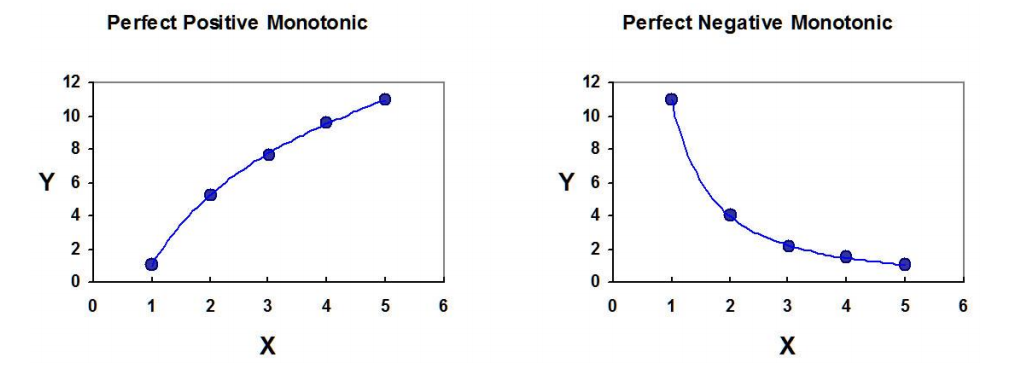

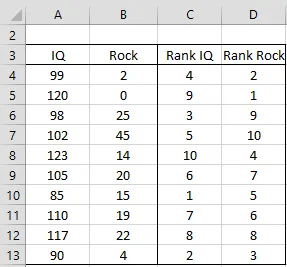

Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))

In [43]:
# calculate the spearmans's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate spearman's correlation
corr, p = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

alpha = 0.05
if p > alpha:	print('Samples are uncorrelated (accept H0) p=%.3f' % p)
else:
	print('Samples are correlated (accept alternative hypothesis) p=%.3f' % p)

Spearmans correlation: 0.872
Samples are correlated (accept alternative hypothesis) p=0.000


### Kendall’s Rank Correlation (Kendall's Tau)
- A τ test is a non-parametric hypothesis test for statistical dependence based on the τ coefficient.
- method assumes (H0) that there is no association between the two samples.
- used to measure the ordinal association between two measured quantities
- Under the null hypothesis of independence of X and Y, the sampling distribution of τ has an expected value of zero.


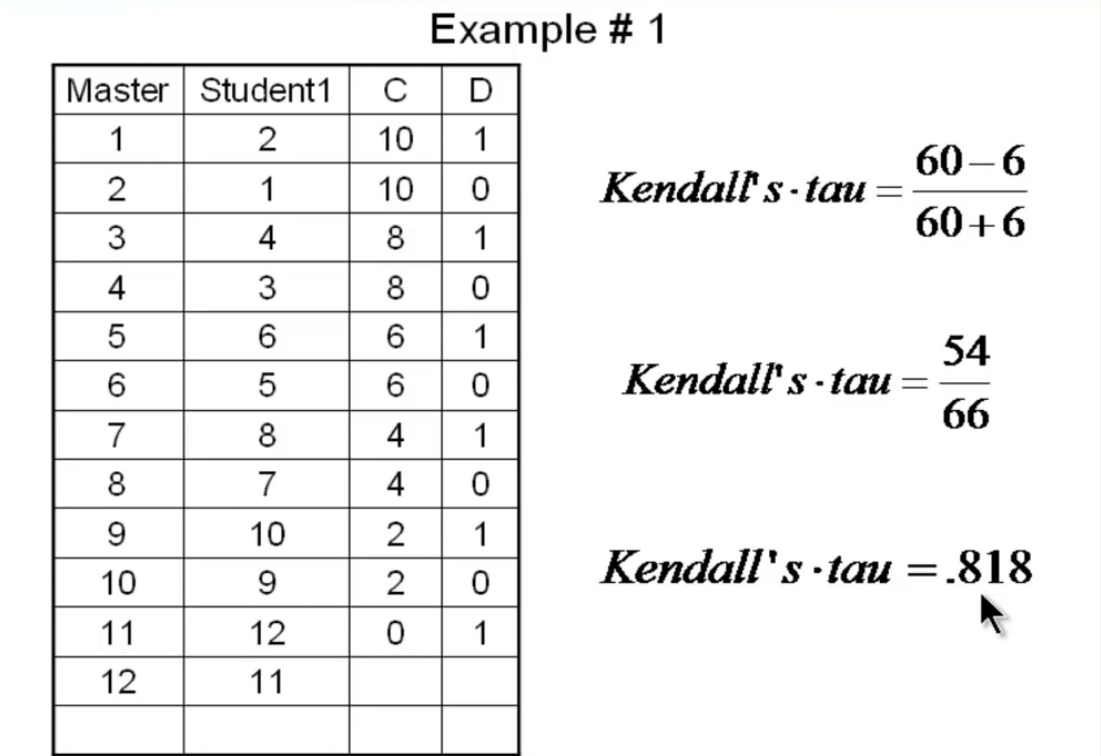

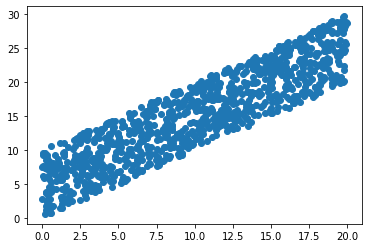

Kendall correlation coefficient: 0.709
Samples are correlated (reject H0) p=0.000


In [44]:
# calculate the kendall's correlation between two variables
from numpy.random import rand
from numpy.random import seed
from scipy.stats import kendalltau
# seed random number generator
seed(1)
# prepare data
data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)
#plot
pyplot.scatter(data1, data2)
pyplot.show()
# calculate kendall's correlation
coef, p = kendalltau(data1, data2)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance

alpha = 0.05
if p > alpha:	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

The p-value is close to zero (and printed as zero), as with the Spearman’s test, meaning that we can confidently reject the null hypothesis that the samples are uncorrelated.

### Plotting the correlation matrix using pandas corr() function

In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
# read the csv file
df = pd.read_csv('data/weatherAUS.csv')

# print the first 5 rows of the data set
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [23]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

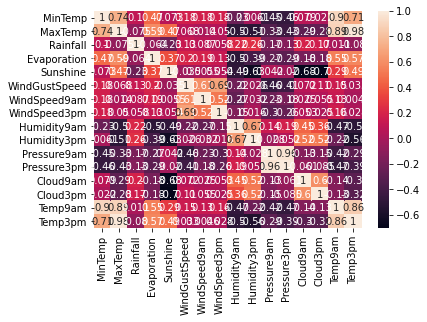

<Figure size 720x720 with 0 Axes>

In [45]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
pyplot.figure(figsize=(10, 10))
pyplot.show()